In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#__author__ = 'Prakhar MISRA'
# Created 8/18/2019
#Last edit 8/18/2010

'''# Purpose: Simple code to format beta saved form R language'''

#Contents:
# 1. cosnider 10km, 20km, 30km radius neughborhood of the central pixel
# 2. count pixels greater than a threshold.
# 3. save this information at daily level and the annual level

# NOTE
# only plotfrp_annual, plotfrp_annual_bymonth works, linkis for aother functins are broken


import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
from datetime import timedelta, date
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import os

currdir = os.getcwd()

In [2]:
beta_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean20012011_meteor__simplemeteor_wnd_pbl_beta.csv')
out_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean20012011_meteor__simplemeteor_wnd_pbl_betaFormatC.csv')

# model with simple extension using rhum and pbl
beta_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean20012011_meteor__simplemeteor_rh_pbl_beta.csv')
out_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", 'allAY20180212IDW2setclean20012011_meteor__simplemeteor_rh_pbl_betaFormatC.csv')
out_path_plot = os.path.join(currdir,"plots", "AQmodel", "beta_value", "allAY20180212IDW2setclean20012011_meteor__simplemeteor_rh_pbl_beta")

# # 9 parameter model with simple extension using rhum and pbl, but also the s,r, were uniromyl for all cities and quite small
beta_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", 'allAY20180212IDW2setclean20012011_meteor_wdpbl_sr_beta.csv')
out_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", 'allAY20180212IDW2setclean20012011_meteor_wdpbl_sr_betaformatC.csv')
out_path_plot = os.path.join(currdir,"plots", "AQmodel", "beta_value", "allAY20180212IDW2setclean20012011_meteor_wdpbl_sr_beta")

# # 9 parameter model with simple extension using rhum and pbl, but also the s,r, were uniromyl for all cities and quite small
beta_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", 'allAY20180212IDW2setclean20012011_meteor_rhpbl_sr_beta.csv')
out_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", 'allAY20180212IDW2setclean20012011_meteor_rhpbl_sr_betaformatC.csv')
out_path_plot = os.path.join(currdir,"plots", "AQmodel", "beta_value", "allAY20180212IDW2setclean20012011_meteor_rhpbl_sr_beta")

# # 10 parameter model with simple extension using wind, rhum and pbl, but also the s,r, were uniromyl for all cities and quite small
beta_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", 'allAY20180212IDW2setclean20012011_meteor_wdrhpbl_sr_beta.csv')
out_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", 'allAY20180212IDW2setclean20012011_meteor_wdrhpbl_sr_betaformatC.csv')
out_path_plot = os.path.join(currdir,"plots", "AQmodel", "beta_value", "allAY20180212IDW2setclean20012011_meteor_wdrhpbl_sr_beta")


# # for sulphate aerosol corrected beta,  10 parameter model with simple extension using wind, rhum and pbl, but also the s,r, were uniromyl for all cities and quite small
beta_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction", 'beta_wnd_rh_pbl_sr.csv')
out_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction", 'beta_wnd_rh_pbl_sr_betaformatC.csv')
out_path_plot = os.path.join(currdir,"plots", "AQmodel", "beta_value", "allAY20180212IDW2setclean20012011_meteor_wdrhpblSO2_sr_beta")

# INCORRECT s,r value:::# removing values of the rainy season 6,7,8 and seeing its impcat on the previous for sulphate aerosol corrected beta,  10 parameter model with simple extension using wind, rhum and pbl, but also the s,r, were uniromyl for all cities and quite small
#beta_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction", 'beta_norain.csv')
#out_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction", 'beta_norainformatC.csv')
#out_path_plot = os.path.join(currdir,"plots", "AQmodel", "beta_value", "allAY20180212IDW2setclean20012011_meteor_wdrhpblSO2_sr_noRain_beta")

# # removing values of the rainy season 6,7,8 and seeing its impcat on the previous for sulphate aerosol corrected beta,  10 parameter model with simple extension using wind, rhum and pbl, but also the s,r, were uniromyl for all cities and quite small
beta_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction", 'beta_wnd_rh_pbl_sr.csv')
out_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "s_r_fromREASmodel", "sulphate_aerosol_correction", 'beta_formatC.csv')



#  SUBMITTED
# Using the same SEA as origianl # removing values of the rainy season 6,7,8 and seeing its impcat on the previous for sulphate aerosol corrected beta,  10 parameter model with simple extension using wind, rhum and pbl, but also the s,r, were uniromyl for all cities and quite small
beta_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "SO2_crctn", 'beta_wnd_rh_pbl.csv')
out_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "SO2_crctn", 'beta_formatC.csv')
out_path_plot = os.path.join(currdir,"plots", "AQmodel", "beta_value", "Final_meteor_wdrhpblSO2_beta")

# no rain case on previous # Using the same SEA as origianl # removing values of the rainy season 6,7,8 and seeing its impcat on the previous for sulphate aerosol corrected beta,  10 parameter model with simple extension using wind, rhum and pbl, but also the s,r, were uniromyl for all cities and quite small
beta_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "SO2_crctn", "no_rain", 'beta_wnd_rh_pbl_noR.csv')
out_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "SO2_crctn", "no_rain",  'beta_formatC.csv')
out_path_plot = os.path.join(currdir,"plots", "AQmodel", "beta_value", "Final_meteor_wdrhpblSO2_norain_beta")

# wind can only be LE 0 case on previous # parameter model with simple extension using wind, rhum and pbl, but also the s,r, were uniromyl for all cities and quite small
#beta_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "SO2_crctn", "wnd_le0", 'beta_wndle0_rh_pbl.csv')
#out_path = os.path.join(currdir, "my_bayesian",  "HBM_city_tier_20180116","report20180212_IDW2_20190814", "meteorology_model", "SO2_crctn", "wnd_le0",  'beta_formatC.csv')
#out_path_plot = os.path.join(currdir,"plots", "AQmodel", "beta_value", "Final_meteor_wdrhpblSO2_wndLE0_beta")


df_beta = pd.read_csv(beta_path, header = 0)

In [3]:
# Tier beta
list_Tier1  = ["beta1_2.1", "beta2_2.1", "beta3_2.1", "beta4_2.1", "beta5_2.1", "beta6_2.1", "beta7_2.1", "beta8_2.1", "beta9_2.1", "beta10_2.1" ]
list_Tier2  = ["beta1_2.2", "beta2_2.2", "beta3_2.2", "beta4_2.2", "beta5_2.2", "beta6_2.2", "beta7_2.2", "beta8_2.2", "beta9_2.2" , "beta10_2.2"]

#city beta
list_city = ["beta1", "beta2", "beta3", "beta4", "beta5", "beta6", "beta7", "beta8", "beta9", "beta10" ]
list_citysd = [a + "sd" for a in list_city] + ["cityID2"]


# list_city1 = [ a + ".1" for a in list_city]
# list_city2 = [ a + ".2" for a in list_city]
# list_city3 = [ a + ".3" for a in list_city]
# list_city4 = [ a + ".4" for a in list_city]
# list_city5 = [ a + ".5" for a in list_city]
# list_city6 = [ a + ".6" for a in list_city]
# list_city7 = [ a + ".7" for a in list_city]
# list_city8 = [ a + ".8" for a in list_city]
# list_city9 = [ a + ".9" for a in list_city]
# list_city10 = [ a + ".10" for a in list_city]
# list_city11 = [ a + ".11" for a in list_city]
# list_city12 = [ a + ".12" for a in list_city]
# list_city13 = [ a + ".13" for a in list_city]
# list_city14 = [ a + ".14" for a in list_city]
# list_city15 = [ a + ".15" for a in list_city]
# list_city16 = [ a + ".16" for a in list_city]


# better way 

d={}
for x in range(1,17):
        d["list_city{0}".format(x)]=[ a + ".{}".format(x) for a in list_city]

In [4]:
list_df = []
for x in range(1,17):
    df = df_beta[d["list_city{0}".format(x)]].set_axis(list_city, axis=1, inplace=False).describe().loc[["mean", "std"]]
    df["cityID2"] = x
    
    list_df.append(df)
    
df_final = pd.concat(list_df)

In [5]:
#s aev only the beta mena and sd for calculating rest

df_final_mean = df_final.loc[["mean"]]
df_final_mean.set_index("cityID2", inplace = True)

df_final_std = df_final.loc[["std"]].set_axis(list_citysd, axis=1, inplace=False)
df_final_std.set_index("cityID2", inplace = True)

# run this final piece
df_finalbeta = pd.concat([df_final_mean, df_final_std], axis =1)
df_finalbeta.to_csv(out_path)

In [6]:
#drop column corresponding to the _0
df = df_beta[df_beta.columns.drop(list(df_beta.filter(regex='_0')))]

# also drop tier level info
df = df[df.columns.drop(list(df.filter(regex='_2')))]

# citylist
citylist = [ 'Chennai', "Mumbai", "NewDelhi", "Bangalore", "Hyderabad", "Kolkata", "Agra", 'Ahmedabad', 'Allahabad', "Amritsar", 'Kanpur', 'Lucknow', 'Ludhiana', 'Patna', 'Raipur', 'Jaipur']   
tiercitylist = [ 'Chennai-1', "Mumbai-1", "NewDelhi-1", "Bangalore-1", "Hyderabad-1", "Kolkata-1", "Agra-2", 'Ahmedabad-2', 'Allahabad-2', "Amritsar-2", 'Kanpur-2', 'Lucknow-2', 'Ludhiana-2', 'Patna-2', 'Raipur-2', 'Jaipur-2']   

,Chennai-1,Mumbai-1,NewDelhi-1,Bangalore-1,Hyderabad-1,Kolkata-1,Agra-2,Ahmedabad-2,Allahabad-2,Amritsar-2,Kanpur-2,Lucknow-2,Ludhiana-2,Patna-2,Raipur-2,Jaipur-2,Tier-1,Tier-2
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,23.189351,21.793264,25.656037,19.300419,6.876341,21.204785,26.015962,20.393909,23.551577,23.419333,28.078173,31.899430,27.496258,25.865480,23.268275,7.449974,22.277489,22.171962
std,6.449221,4.153518,5.459685,7.353393,5.196186,7.123578,7.819743,4.258347,6.544260,6.669057,6.626712,5.514893,6.276844,6.530809,4.278543,4.051151,6.713446,4.627268
min,2.052305,7.092606,9.799411,-3.520948,-9.313785,0.048639,4.738373,6.646246,-2.500757,2.686989,6.443781,12.687100,5.291758,7.197226,10.180701,-7.027183,-5.229886,6.645780
25%,18.831001,18.958193,21.793795,14.386587,3.205355,16.157655,20.439733,17.257667,19.200360,19.021153,23.649703,27.840598,23.119742,21.407548,20.288024,4.652177,18.332047,19.389257
50%,23.188922,21.985865,25.470119,19.498189,6.935321,21.095449,25.212271,20.234995,23.656121,23.194567,28.136068,31.639169,27.157850,25.577295,23.256652,7.670434,22.073269,22.205657
75%,27.483802,24.734554,29.419051,24.364784,10.367915,26.310968,31.131949,23.606399,27.689497,27.972674,32.876773,35.887466,31.554029,30.388213,26.234279,10.263919,26.557347,25.224465
max,39.796551,34.199399,42.334357,42.359103,20.463750,40.076976,49.962905,31.842373,46.701614,44.580485,45.814687,47.409447,47.516935,47.144086,36.892788,17.869457,44.166881,36.720355


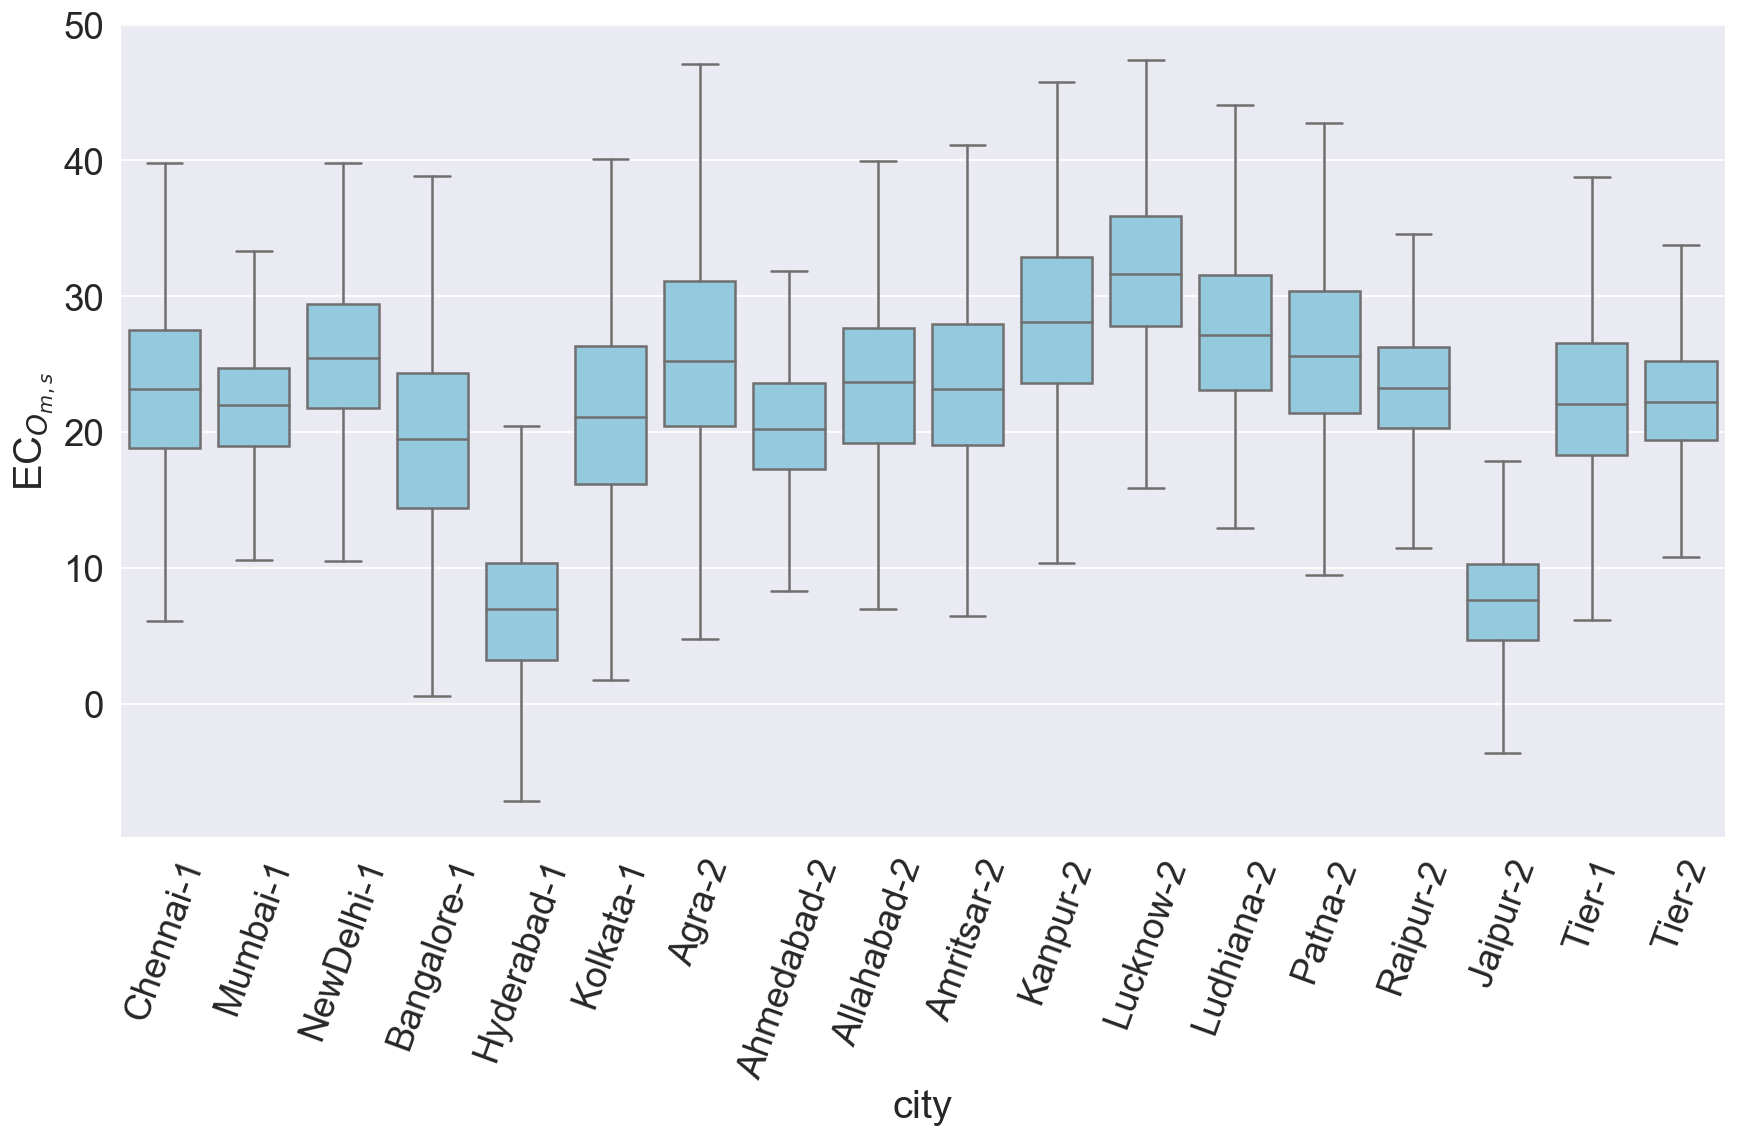

In [7]:
# beta 1
# get the sample trace for any particular beta
sdf = df.filter(regex=("beta1..")).drop(['beta10.1', 'beta10.2',
       'beta10.3', 'beta10.4', 'beta10.5', 'beta10.6', 'beta10.7', 'beta10.8',
       'beta10.9', 'beta10.10', 'beta10.11', 'beta10.12', 'beta10.13',
       'beta10.14', 'beta10.15', 'beta10.16', 'sigma_beta10r',
       'sigma_beta100'], axis = 1)
#replace the column name by city names (cityname s according to cityID2)
sdf.columns =  tiercitylist

# also add tier level summary 
sdf["Tier-1"] = df_beta["beta1_2.1"]
sdf["Tier-2"] = df_beta["beta1_2.2"]


#plot
sns.set(font_scale=2)
fig=plt.figure(figsize=(15, 10), dpi= 120, facecolor='w', edgecolor='k')
sns_plot = sns.boxplot(x="variable", y="value", data=pd.melt(sdf), showfliers=False, color="skyblue")
sns_plot.set(xlabel='city', ylabel='EC$_{O_{m,s}}$')
plt.xticks(rotation=70)
plt.tight_layout()
sns_plot.get_figure().savefig(os.path.join(out_path_plot, "beta1.png"))

sdf.describe()

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Chennai-1,Mumbai-1,NewDelhi-1,Bangalore-1,Hyderabad-1,Kolkata-1,Agra-2,Ahmedabad-2,Allahabad-2,Amritsar-2,Kanpur-2,Lucknow-2,Ludhiana-2,Patna-2,Raipur-2,Jaipur-2,Tier-1,Tier-2
count,1334.000000,1334.000000,1334.000000,1.334000e+03,1.334000e+03,1334.000000,1334.000000,1.334000e+03,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1.334000e+03,1334.000000,1334.000000
mean,0.000731,0.000195,0.000511,1.025556e-04,1.124578e-04,0.001131,0.001173,6.960972e-05,0.002501,0.001028,0.000974,0.001020,0.000775,0.002047,0.000517,8.504660e-05,0.001093,0.000677
std,0.000320,0.000135,0.000139,7.212243e-05,1.030425e-04,0.000460,0.000260,5.788653e-05,0.000517,0.000437,0.000246,0.000171,0.000221,0.000419,0.000244,7.658929e-05,0.000369,0.000272
min,0.000013,0.000001,0.000151,4.940889e-07,2.520860e-07,0.000039,0.000458,3.057350e-07,0.000787,0.000031,0.000173,0.000504,0.000172,0.000614,0.000024,1.412911e-07,0.000145,0.000020
25%,0.000504,0.000088,0.000412,4.497835e-05,3.637524e-05,0.000817,0.000994,2.416978e-05,0.002175,0.000763,0.000813,0.000898,0.000622,0.001782,0.000343,2.835815e-05,0.000833,0.000481
50%,0.000709,0.000174,0.000508,8.838549e-05,8.097873e-05,0.001097,0.001171,5.269118e-05,0.002485,0.001008,0.000979,0.001018,0.000772,0.002039,0.000505,6.445892e-05,0.001062,0.000662
75%,0.000961,0.000279,0.000607,1.447377e-04,1.622259e-04,0.001432,0.001356,1.021860e-04,0.002810,0.001320,0.001139,0.001132,0.000923,0.002309,0.000667,1.166478e-04,0.001313,0.000849
max,0.001744,0.000703,0.000961,3.993462e-04,5.352374e-04,0.003152,0.001944,3.237436e-04,0.004471,0.002670,0.001803,0.001658,0.001491,0.003311,0.001317,5.695636e-04,0.003452,0.001732


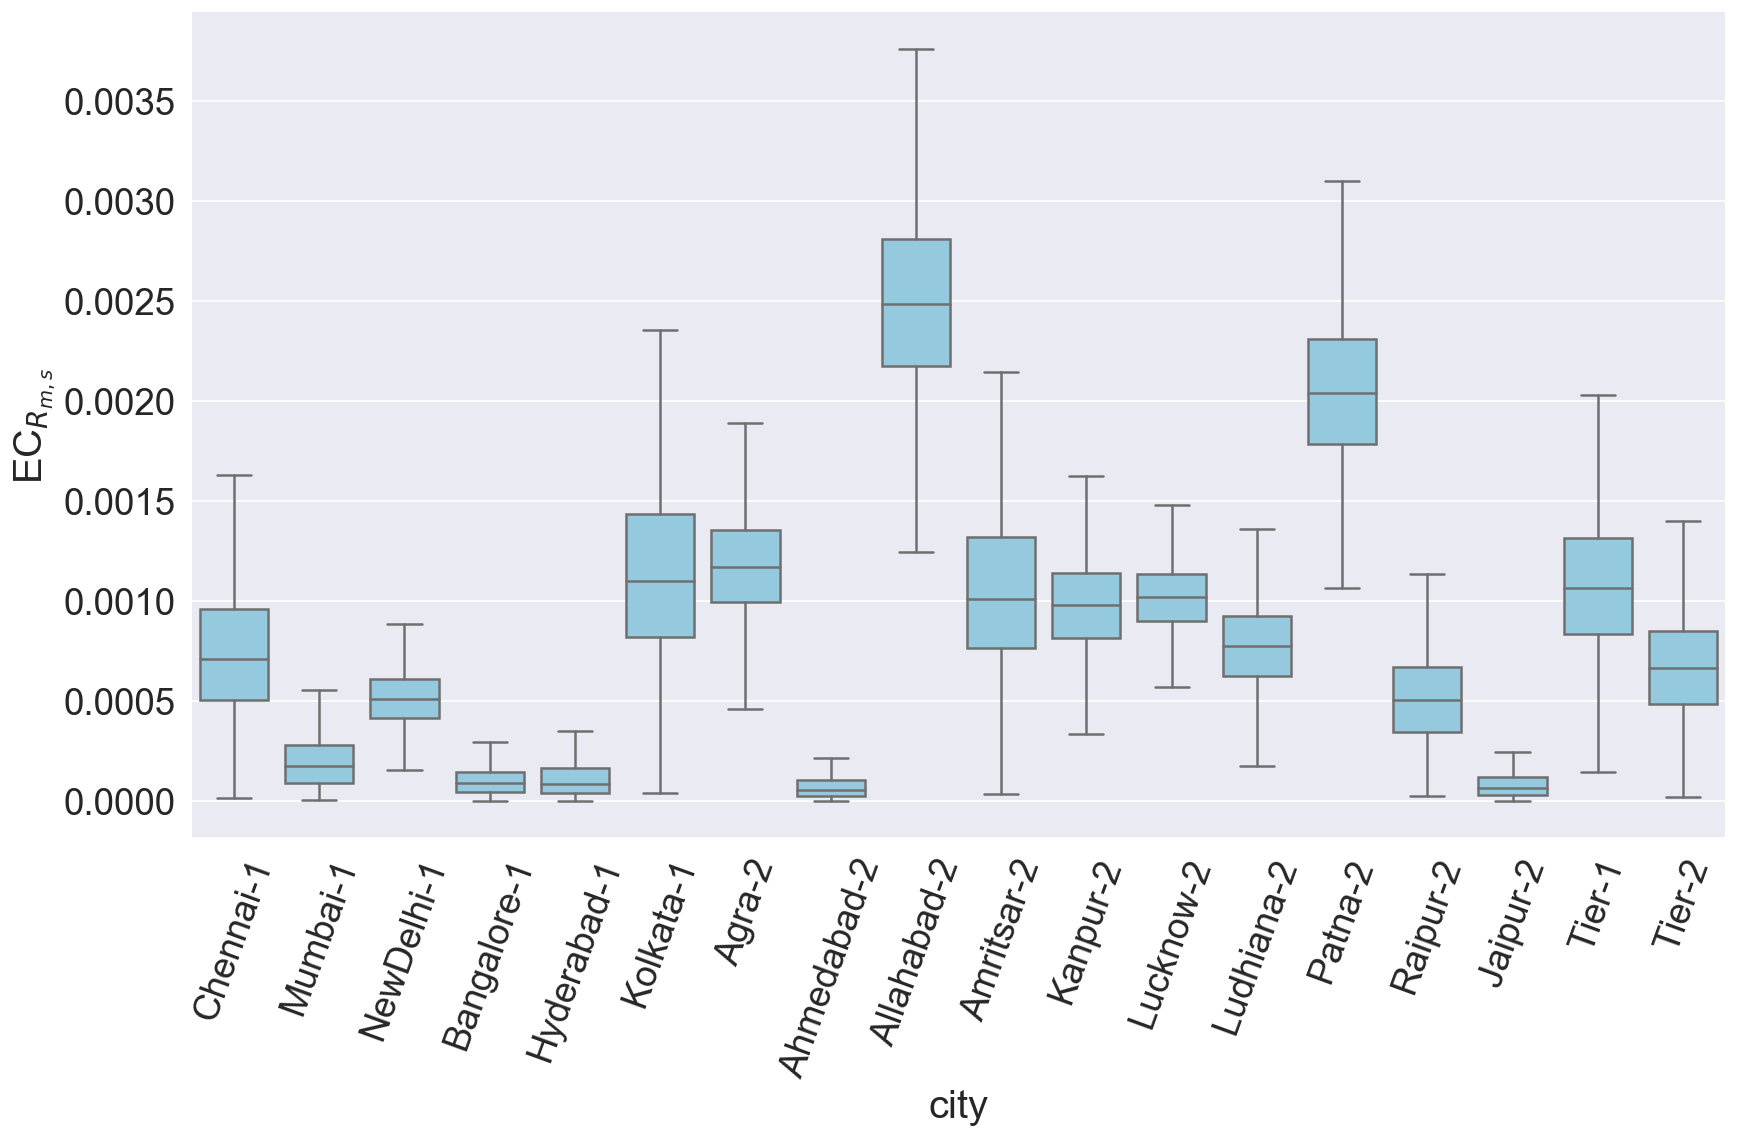

In [135]:
# beta 2
# get the sample trace for any particular beta
sdf = df.filter(regex=("beta2.."))
#replace the column name by city names (cityname s according to cityID2)
sdf.columns =  tiercitylist



# also add tier level summary 
sdf["Tier-1"] = df_beta["beta2_2.1"]
sdf["Tier-2"] = df_beta["beta2_2.2"]


#plot
sns.set(font_scale=2)
fig=plt.figure(figsize=(15, 10), dpi= 120, facecolor='w', edgecolor='k')
sns_plot = sns.boxplot(x="variable", y="value", data=pd.melt(sdf), showfliers=False, color="skyblue")
sns_plot.set(xlabel='city', ylabel='EC$_{R_{m,s}}$')
plt.xticks(rotation=70)
plt.tight_layout()
sns_plot.get_figure().savefig(os.path.join(out_path_plot, "beta2.png"))

sdf.describe()

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Chennai-1,Mumbai-1,NewDelhi-1,Bangalore-1,Hyderabad-1,Kolkata-1,Agra-2,Ahmedabad-2,Allahabad-2,Amritsar-2,Kanpur-2,Lucknow-2,Ludhiana-2,Patna-2,Raipur-2,Jaipur-2,Tier-1,Tier-2
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1.334000e+03,1334.000000,1334.000000,1334.000000,1334.000000,1.334000e+03,1334.000000,1334.000000,1334.000000,1334.000000
mean,0.000302,0.000264,0.000285,0.000266,0.000398,0.000482,0.000470,0.000303,3.164453e-04,0.000478,0.000305,0.000324,0.000468,4.504411e-04,0.000310,0.000317,0.000464,0.000298
std,0.000241,0.000165,0.000201,0.000181,0.000302,0.000397,0.000375,0.000222,2.697418e-04,0.000384,0.000241,0.000268,0.000356,3.461271e-04,0.000228,0.000273,0.000341,0.000194
min,0.000005,0.000008,0.000003,0.000004,0.000002,0.000010,0.000010,0.000002,5.034681e-07,0.000008,0.000003,0.000007,0.000014,9.476101e-07,0.000007,0.000010,0.000017,0.000006
25%,0.000133,0.000130,0.000134,0.000124,0.000177,0.000221,0.000197,0.000142,1.464145e-04,0.000214,0.000150,0.000146,0.000214,2.099068e-04,0.000142,0.000147,0.000229,0.000155
50%,0.000255,0.000241,0.000247,0.000231,0.000324,0.000378,0.000377,0.000256,2.723910e-04,0.000387,0.000252,0.000260,0.000385,3.598910e-04,0.000267,0.000258,0.000368,0.000267
75%,0.000392,0.000361,0.000387,0.000369,0.000521,0.000648,0.000644,0.000403,4.075200e-04,0.000634,0.000396,0.000427,0.000623,5.933180e-04,0.000406,0.000402,0.000607,0.000400
max,0.002137,0.000930,0.001647,0.001297,0.002007,0.004898,0.002485,0.001717,2.624060e-03,0.003345,0.002550,0.003107,0.003682,3.020991e-03,0.001916,0.002558,0.002592,0.001394


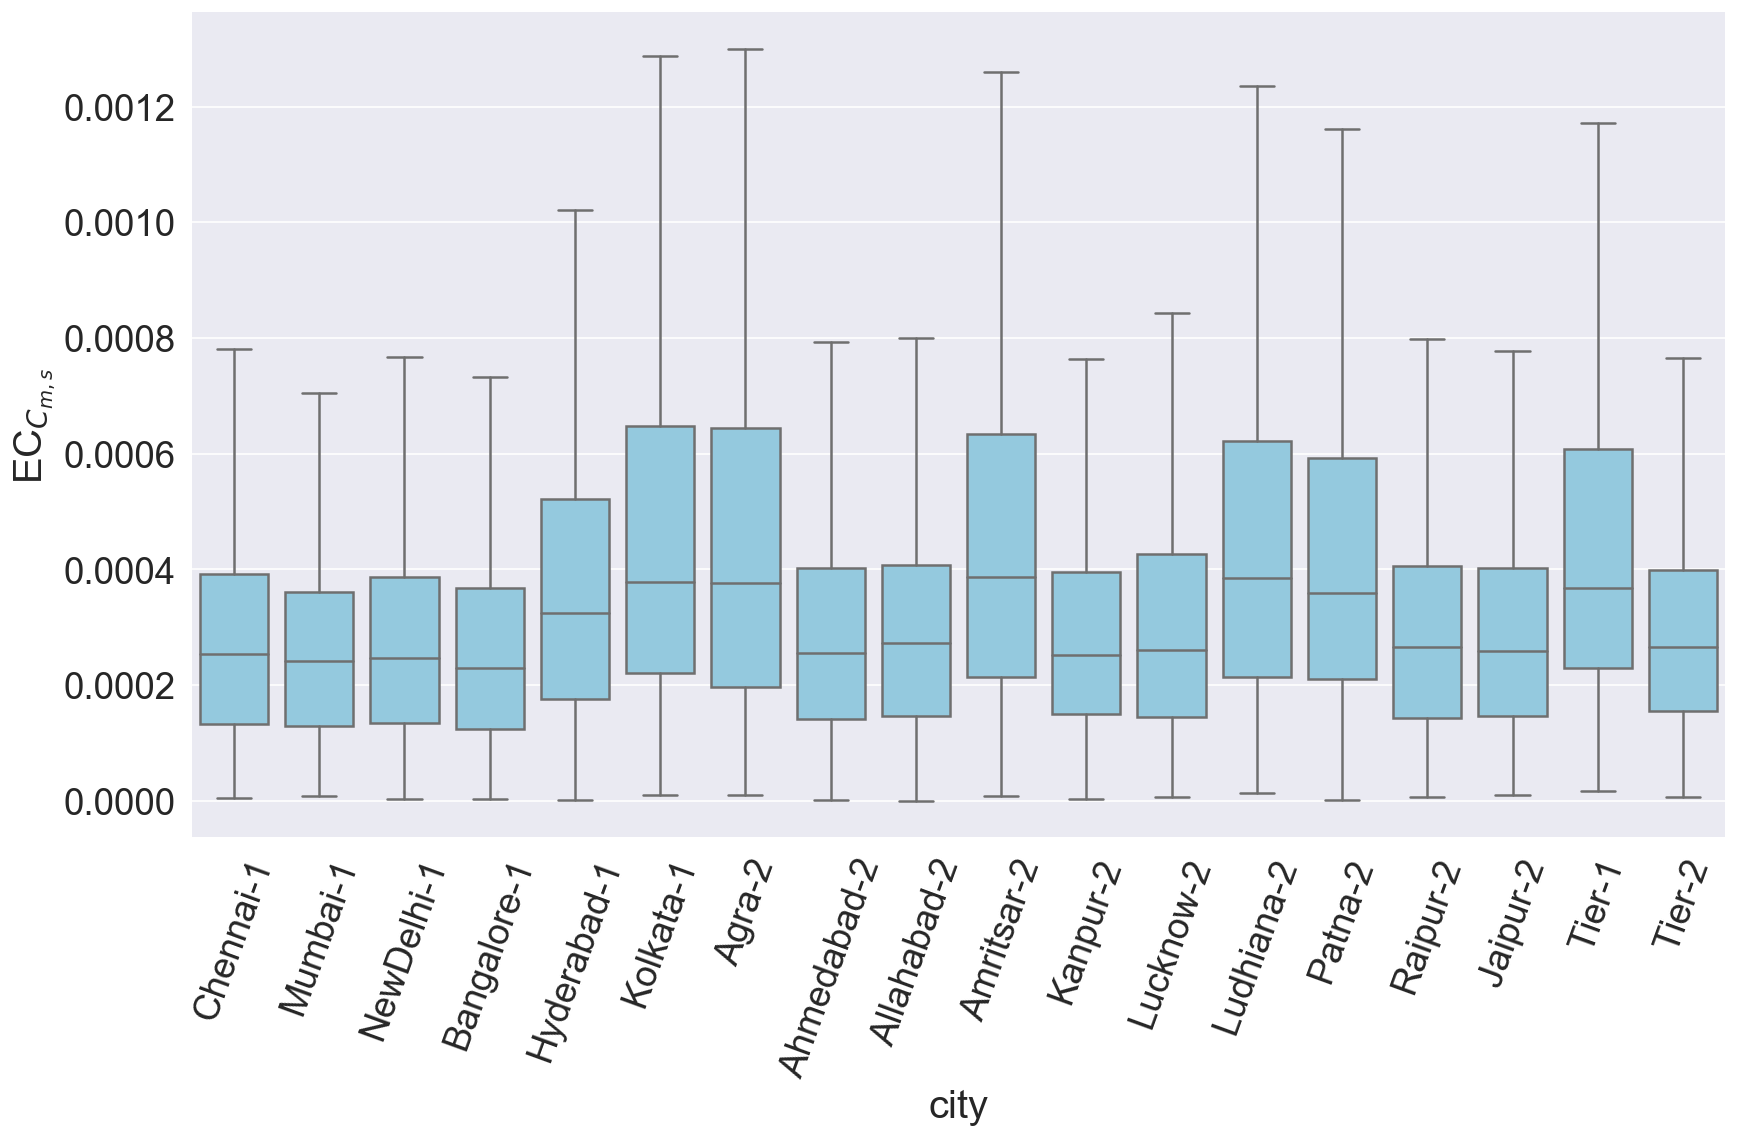

In [136]:
# beta 3
# get the sample trace for any particular beta
sdf = df.filter(regex=("beta3.."))
#replace the column name by city names (cityname s according to cityID2)
sdf.columns =  tiercitylist


# also add tier level summary 
sdf["Tier-1"] = df_beta["beta3_2.1"]
sdf["Tier-2"] = df_beta["beta3_2.2"]




#plot
sns.set(font_scale=2)
fig=plt.figure(figsize=(15, 10), dpi= 120, facecolor='w', edgecolor='k')
sns_plot = sns.boxplot(x="variable", y="value", data=pd.melt(sdf), showfliers=False, color="skyblue")
sns_plot.set(xlabel='city', ylabel='EC$_{C_{m,s}}$')
plt.xticks(rotation=70)
plt.tight_layout()
sns_plot.get_figure().savefig(os.path.join(out_path_plot, "beta3.png"))

sdf.describe()

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Chennai-1,Mumbai-1,NewDelhi-1,Bangalore-1,Hyderabad-1,Kolkata-1,Agra-2,Ahmedabad-2,Allahabad-2,Amritsar-2,Kanpur-2,Lucknow-2,Ludhiana-2,Patna-2,Raipur-2,Jaipur-2,Tier-1,Tier-2
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,0.000455,0.000373,0.000332,0.000472,0.001195,0.001464,0.001329,0.000287,0.000456,0.001361,0.000365,0.000459,0.001348,0.001244,0.000436,0.000520,0.001326,0.000417
std,0.000412,0.000251,0.000214,0.000376,0.000660,0.000818,0.000719,0.000173,0.000404,0.000817,0.000281,0.000392,0.000740,0.000673,0.000419,0.000476,0.000693,0.000267
min,0.000005,0.000014,0.000002,0.000009,0.000040,0.000112,0.000038,0.000003,0.000006,0.000017,0.000003,0.000004,0.000182,0.000082,0.000007,0.000004,0.000108,0.000032
25%,0.000224,0.000200,0.000186,0.000230,0.000738,0.000920,0.000847,0.000159,0.000232,0.000838,0.000179,0.000225,0.000856,0.000759,0.000203,0.000241,0.000869,0.000248
50%,0.000352,0.000323,0.000296,0.000372,0.001113,0.001304,0.001179,0.000264,0.000351,0.001206,0.000306,0.000357,0.001203,0.001125,0.000331,0.000393,0.001204,0.000364
75%,0.000548,0.000479,0.000451,0.000594,0.001521,0.001819,0.001660,0.000378,0.000551,0.001681,0.000463,0.000542,0.001653,0.001604,0.000523,0.000650,0.001627,0.000500
max,0.003641,0.002244,0.001297,0.003639,0.004551,0.006472,0.004747,0.001141,0.004696,0.008098,0.002226,0.003638,0.004736,0.004402,0.006096,0.004903,0.004543,0.002703


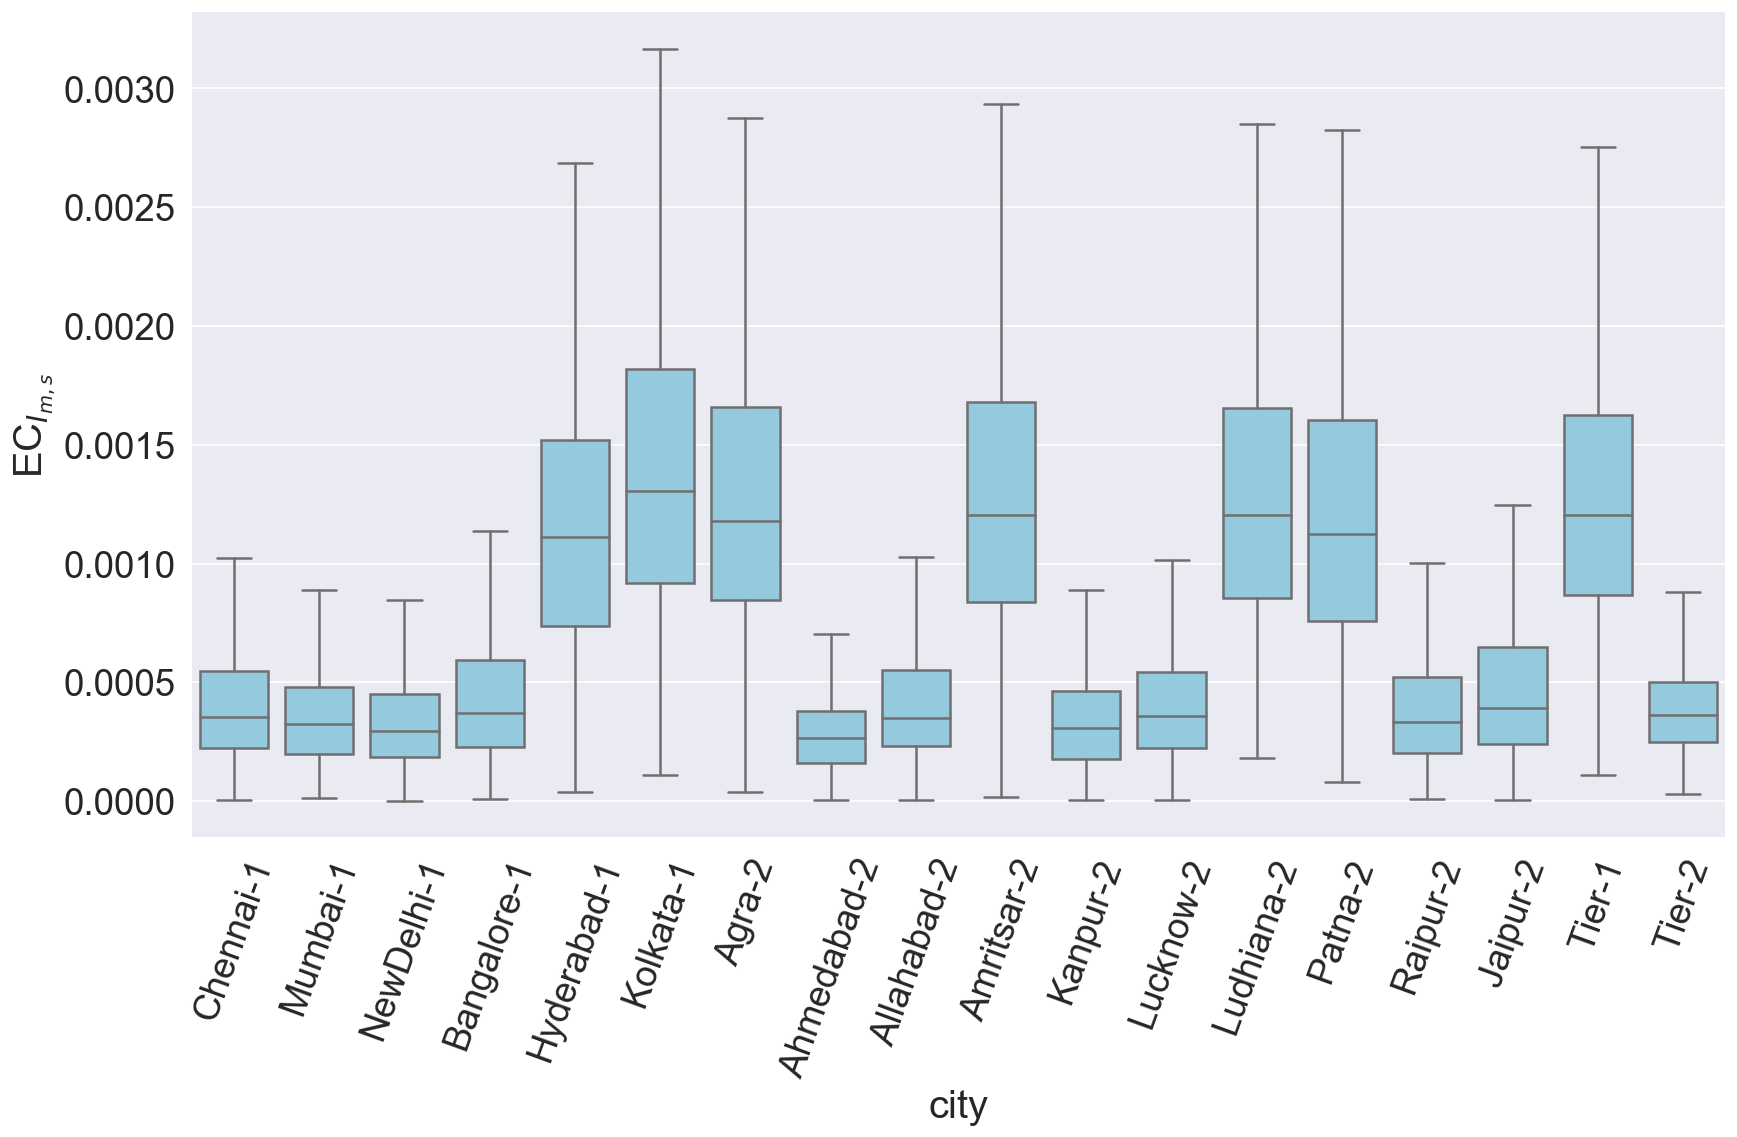

In [137]:
# beta 4
# get the sample trace for any particular beta
sdf = df.filter(regex=("beta4.."))

#replace the column name by city names (cityname s according to cityID2)
sdf.columns =  tiercitylist


# also add tier level summary 
sdf["Tier-1"] = df_beta["beta4_2.1"]
sdf["Tier-2"] = df_beta["beta4_2.2"]



#plot
sns.set(font_scale=2)
fig=plt.figure(figsize=(15, 10), dpi= 120, facecolor='w', edgecolor='k')
sns_plot = sns.boxplot(x="variable", y="value", data=pd.melt(sdf), showfliers=False, color="skyblue")
sns_plot.set(xlabel='city', ylabel='EC$_{I_{m,s}}$')
plt.xticks(rotation=70)
plt.tight_layout()
sns_plot.get_figure().savefig(os.path.join(out_path_plot, "beta4.png"))

sdf.describe()

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Chennai-1,Mumbai-1,NewDelhi-1,Bangalore-1,Hyderabad-1,Kolkata-1,Agra-2,Ahmedabad-2,Allahabad-2,Amritsar-2,Kanpur-2,Lucknow-2,Ludhiana-2,Patna-2,Raipur-2,Jaipur-2,Tier-1,Tier-2
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,0.132199,0.126647,0.152131,0.121364,0.050345,0.052097,0.050459,0.133185,0.121757,0.035686,0.116375,0.120166,0.054474,0.045501,0.140684,0.132941,0.047829,0.127837
std,0.051776,0.051784,0.036175,0.048534,0.035565,0.039968,0.034478,0.050954,0.051782,0.024283,0.054803,0.053712,0.027928,0.034021,0.044925,0.056742,0.026237,0.041489
min,0.011263,0.001939,0.026470,0.012189,0.000185,0.000175,0.000777,0.012444,0.012464,0.000157,0.003919,0.002397,0.004095,0.000028,0.028159,0.001331,0.002563,0.034494
25%,0.099339,0.096011,0.130493,0.087988,0.023477,0.022280,0.025163,0.097824,0.085533,0.017654,0.074312,0.088038,0.034157,0.020006,0.108063,0.099321,0.030266,0.099515
50%,0.129588,0.126400,0.149549,0.118318,0.044596,0.045063,0.043689,0.133866,0.120173,0.031968,0.118515,0.121618,0.050613,0.039789,0.138174,0.134572,0.043115,0.124344
75%,0.159959,0.157455,0.172610,0.152004,0.068932,0.071082,0.068176,0.164990,0.155491,0.050165,0.150999,0.154011,0.070933,0.062180,0.166188,0.166061,0.062891,0.151899
max,0.516897,0.350545,0.288628,0.287179,0.236042,0.246607,0.211330,0.296243,0.285592,0.147756,0.281249,0.301553,0.160860,0.172887,0.310138,0.323311,0.156409,0.289467


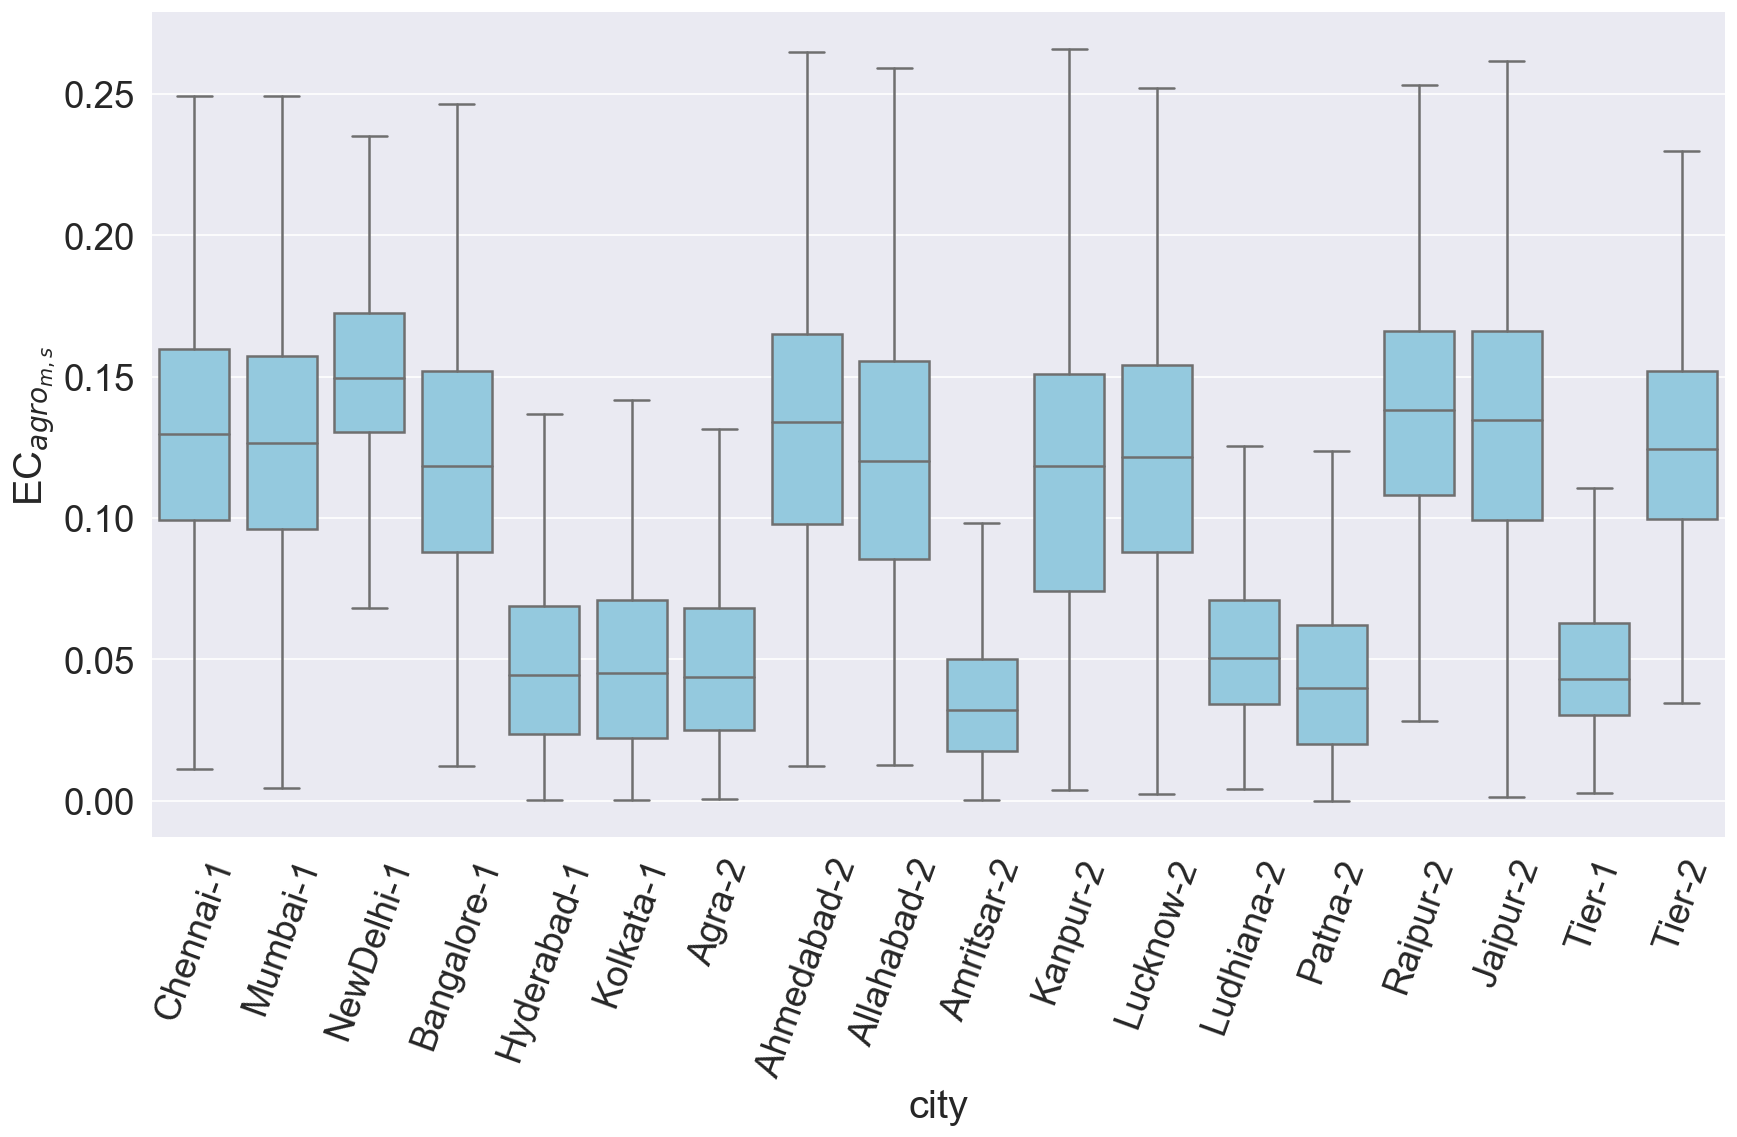

In [138]:
# beta 5
# get the sample trace for any particular beta
sdf = df.filter(regex=("beta5.."))
#replace the column name by city names (cityname s according to cityID2)
sdf.columns =  tiercitylist



# also add tier level summary 
sdf["Tier-1"] = df_beta["beta5_2.1"]
sdf["Tier-2"] = df_beta["beta5_2.2"]



#plot
sns.set(font_scale=2)
fig=plt.figure(figsize=(15, 10), dpi= 120, facecolor='w', edgecolor='k')
sns_plot = sns.boxplot(x="variable", y="value", data=pd.melt(sdf), showfliers=False, color="skyblue")
sns_plot.set(xlabel='city', ylabel='EC$_{agro_{m,s}}$')
plt.xticks(rotation=70)
plt.tight_layout()
sns_plot.get_figure().savefig(os.path.join(out_path_plot, "beta5.png"))

sdf.describe()

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Chennai-1,Mumbai-1,NewDelhi-1,Bangalore-1,Hyderabad-1,Kolkata-1,Agra-2,Ahmedabad-2,Allahabad-2,Amritsar-2,Kanpur-2,Lucknow-2,Ludhiana-2,Patna-2,Raipur-2,Jaipur-2,Tier-1,Tier-2
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,0.263390,0.739327,0.107259,0.074038,1.010263,0.915391,0.910705,0.081837,1.006925,0.525688,1.037719,1.086148,0.327227,1.628394,0.786261,0.065134,0.867577,0.535517
std,0.137382,0.558934,0.037176,0.059002,0.568435,0.263906,0.532177,0.077250,0.679789,0.371515,0.429960,0.549783,0.279632,0.393889,0.494586,0.059810,0.319093,0.259835
min,0.006744,0.001009,0.017885,0.000790,0.021961,0.106329,0.015791,0.000013,0.001244,0.001078,0.038202,0.023429,0.000075,0.495018,0.003117,0.000353,0.063302,0.016449
25%,0.164926,0.333057,0.081700,0.029897,0.613137,0.740209,0.505081,0.023954,0.500576,0.234913,0.731023,0.673375,0.107670,1.357547,0.427077,0.021555,0.653432,0.353737
50%,0.251178,0.614957,0.108797,0.059083,0.952454,0.918755,0.852691,0.057095,0.889590,0.453902,0.996500,1.059631,0.252759,1.616352,0.709066,0.048497,0.848488,0.497593
75%,0.354490,1.018891,0.132556,0.102529,1.344779,1.085315,1.244406,0.115635,1.417509,0.754894,1.303659,1.467812,0.494831,1.875683,1.066459,0.090436,1.058066,0.685311
max,0.820563,4.272252,0.235419,0.320947,4.295749,1.894084,2.876019,0.494909,4.621220,1.856082,2.897193,3.009870,1.598904,2.983484,2.592175,0.412245,2.161120,1.495425


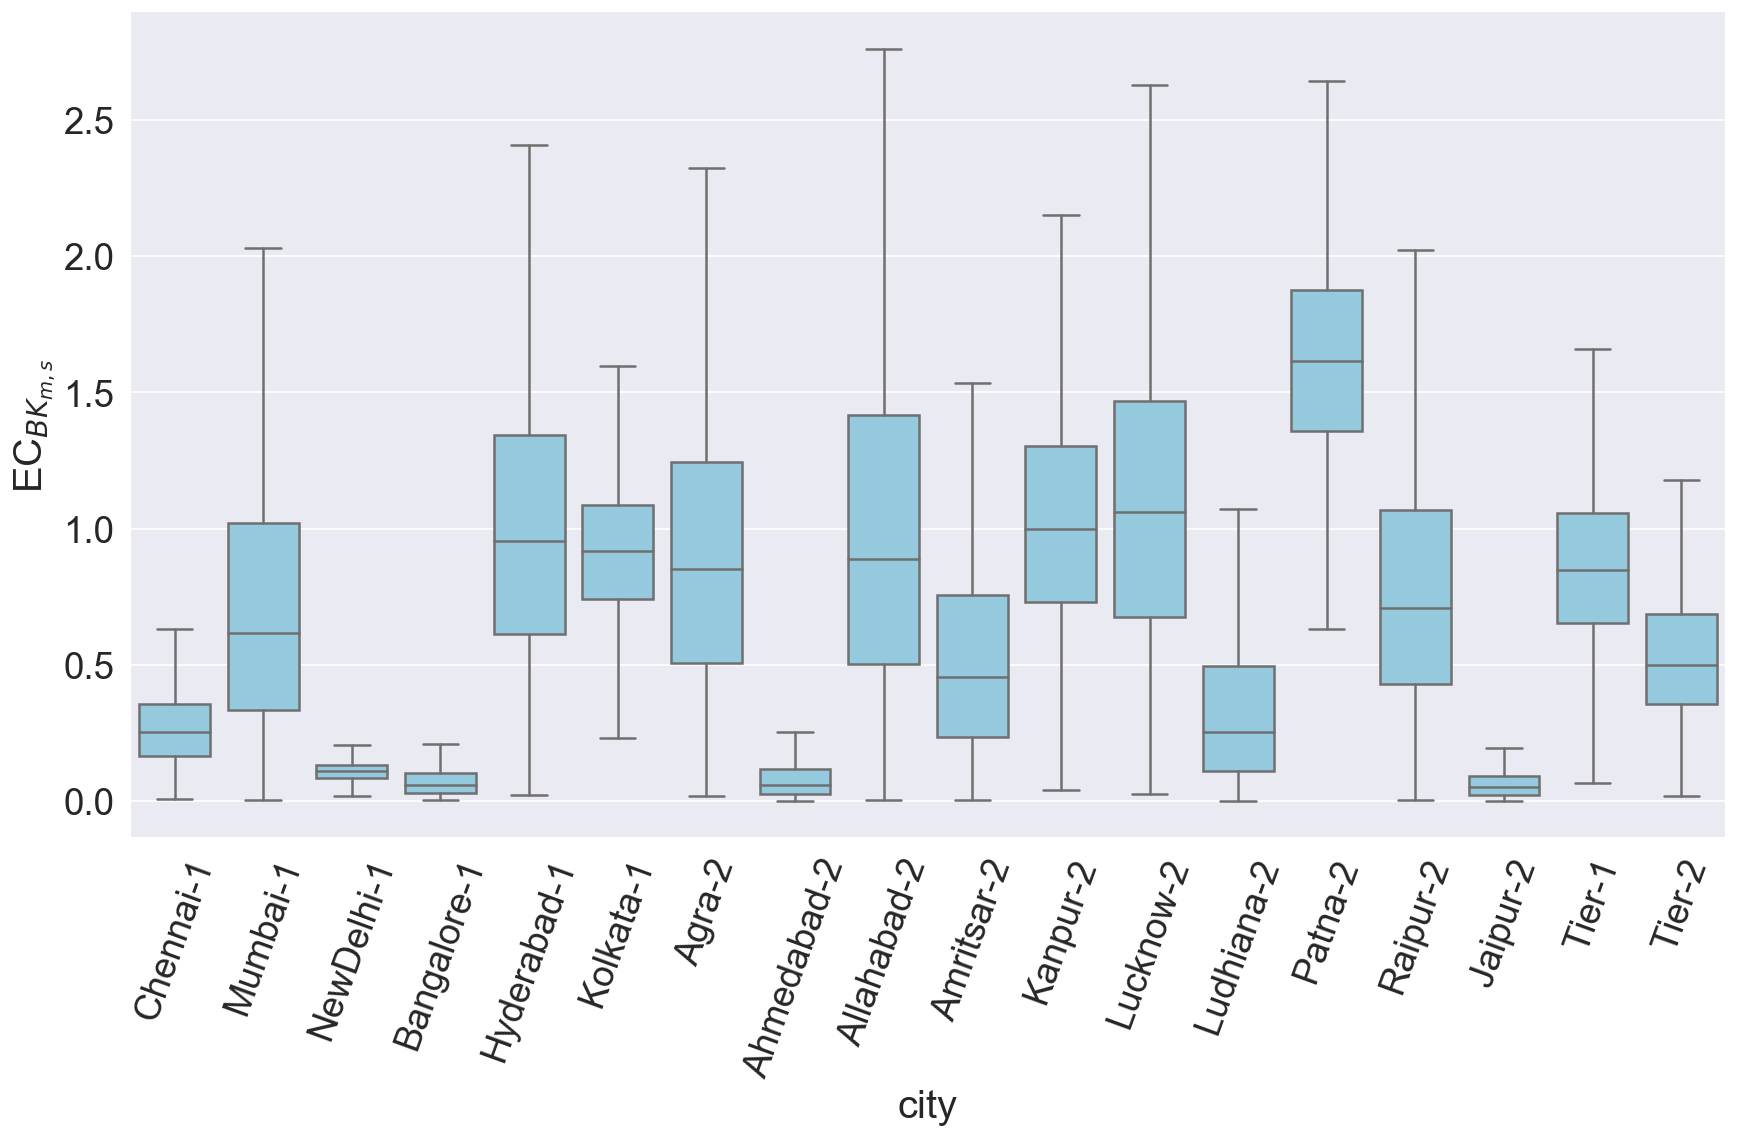

In [139]:
# beta 6
# get the sample trace for any particular beta
sdf = df.filter(regex=("beta6.."))
#replace the column name by city names (cityname s according to cityID2)
sdf.columns =  tiercitylist


# also add tier level summary 
sdf["Tier-1"] = df_beta["beta6_2.1"]
sdf["Tier-2"] = df_beta["beta6_2.2"]




#plot
sns.set(font_scale=2)
fig=plt.figure(figsize=(15, 10), dpi= 120, facecolor='w', edgecolor='k')
sns_plot = sns.boxplot(x="variable", y="value", data=pd.melt(sdf), showfliers=False, color="skyblue")
sns_plot.set(xlabel='city', ylabel='EC$_{BK_{m,s}}$')
plt.xticks(rotation=70)
plt.tight_layout()
sns_plot.get_figure().savefig(os.path.join(out_path_plot, "beta6.png"))

sdf.describe()

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

,Chennai-1,Mumbai-1,NewDelhi-1,Bangalore-1,Hyderabad-1,Kolkata-1,Agra-2,Ahmedabad-2,Allahabad-2,Amritsar-2,Kanpur-2,Lucknow-2,Ludhiana-2,Patna-2,Raipur-2,Jaipur-2,Tier-1,Tier-2
count,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03,1.334000e+03
mean,7.267046e-09,8.755239e-09,7.861980e-09,8.779603e-09,8.855538e-09,6.122543e-09,6.589073e-09,8.598442e-09,9.038967e-09,6.552101e-09,8.538059e-09,8.583559e-09,6.073688e-09,6.096733e-09,8.855538e-09,8.479958e-09,5.710560e-09,8.474324e-09
std,3.051206e-09,5.256600e-09,4.350564e-09,5.503133e-09,5.416251e-09,5.155717e-09,5.973783e-09,5.678837e-09,6.030930e-09,5.766335e-09,5.522106e-09,5.477042e-09,5.381079e-09,5.544788e-09,5.416251e-09,5.156635e-09,4.217404e-09,4.016202e-09
min,1.056040e-09,4.368014e-10,2.602699e-10,4.416405e-10,1.317135e-10,7.541165e-11,1.557842e-11,1.852819e-10,5.682251e-11,1.195531e-10,3.566302e-10,1.783101e-10,1.533320e-10,3.391514e-11,1.317135e-10,3.080698e-10,2.213444e-10,1.239353e-09
25%,4.962054e-09,5.169043e-09,4.874775e-09,5.312315e-09,5.249494e-09,2.883188e-09,2.987363e-09,5.147951e-09,5.304188e-09,3.122695e-09,5.004974e-09,4.930199e-09,2.790260e-09,2.851513e-09,5.249494e-09,5.174861e-09,3.054095e-09,5.583894e-09
50%,6.943572e-09,7.685031e-09,7.105134e-09,7.527505e-09,7.835680e-09,4.565186e-09,4.704935e-09,7.495311e-09,7.706116e-09,4.862239e-09,7.514250e-09,7.800380e-09,4.612892e-09,4.661365e-09,7.835680e-09,7.580337e-09,4.657227e-09,7.913216e-09
75%,9.164070e-09,1.089440e-08,1.003033e-08,1.068608e-08,1.069618e-08,7.946242e-09,8.170620e-09,1.060845e-08,1.102621e-08,7.576535e-09,1.064187e-08,1.069765e-08,7.585147e-09,7.353382e-09,1.069618e-08,1.040749e-08,6.986649e-09,1.050505e-08
max,1.855842e-08,4.595101e-08,3.198562e-08,5.082724e-08,5.318782e-08,4.552572e-08,5.977361e-08,6.506872e-08,8.902166e-08,4.859004e-08,6.455002e-08,3.818953e-08,5.154936e-08,6.354188e-08,5.318782e-08,4.381473e-08,4.224726e-08,3.465846e-08


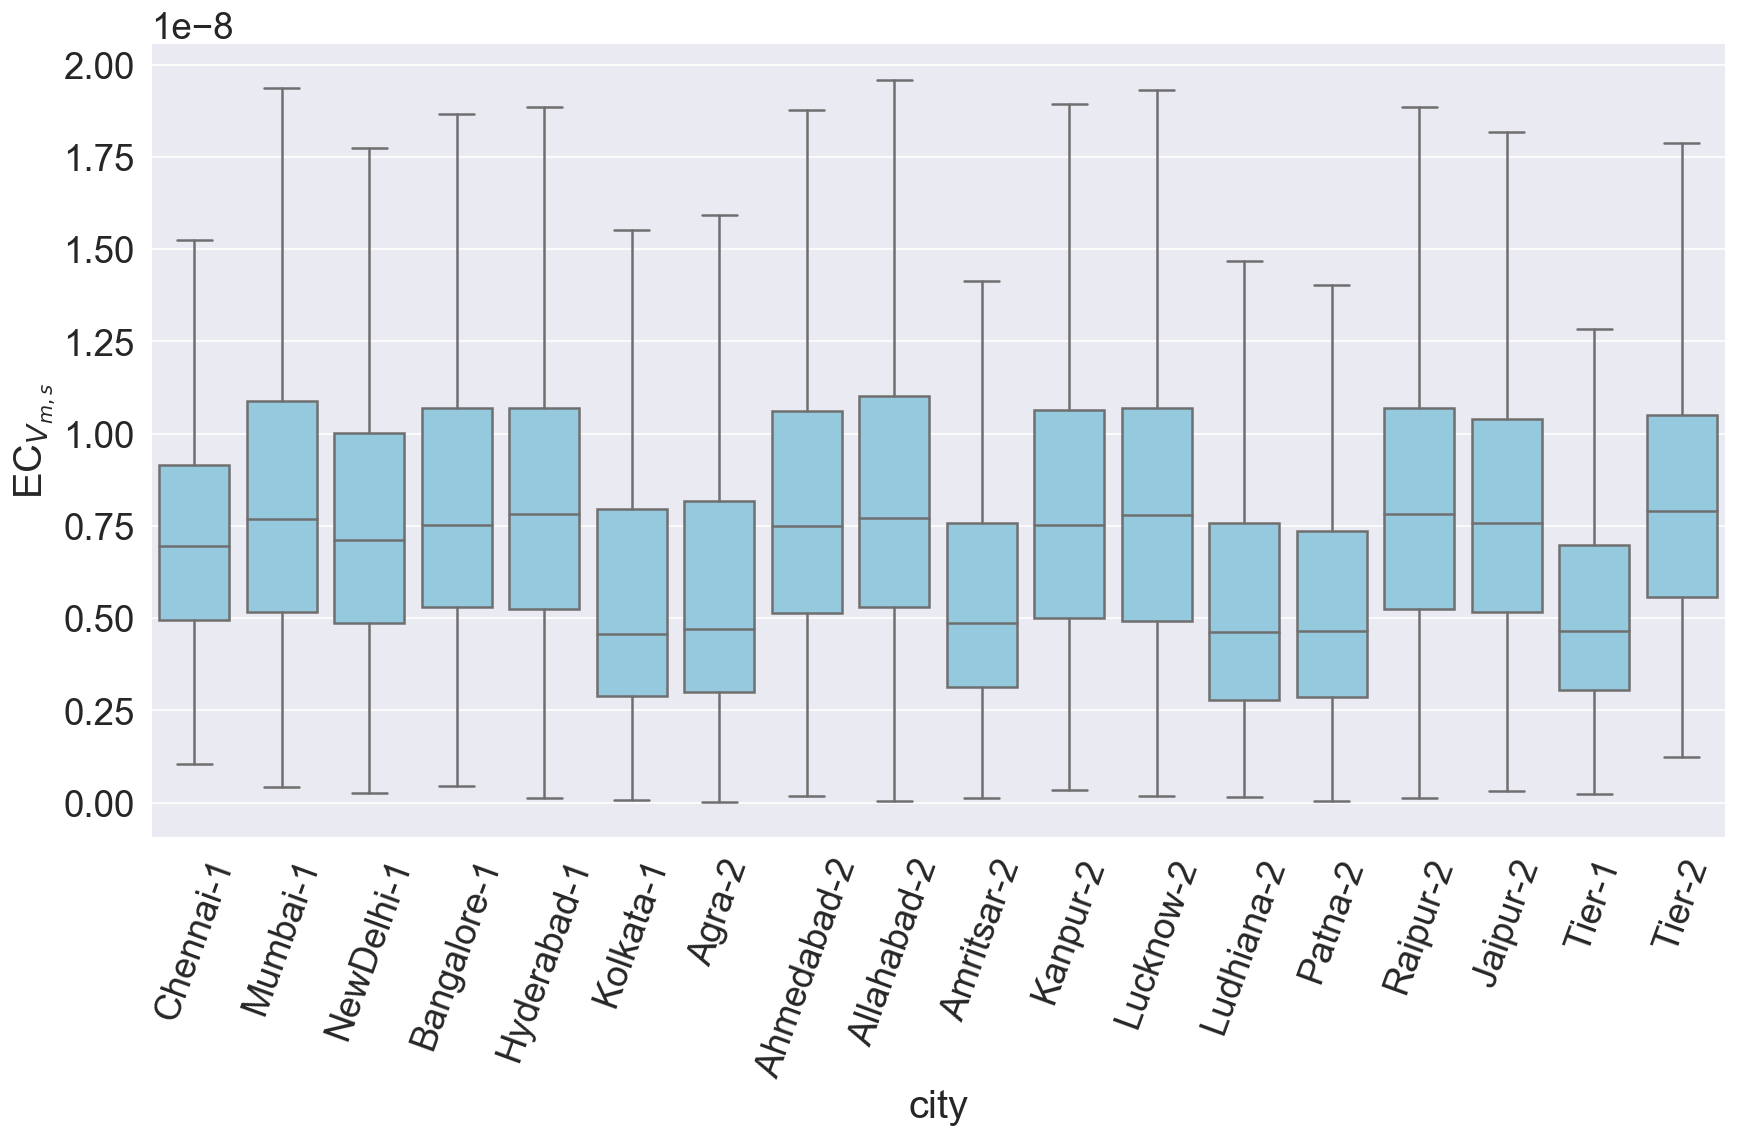

In [140]:
# beta 7
# get the sample trace for any particular beta
sdf = df.filter(regex=("beta7.."))
#replace the column name by city names (cityname s according to cityID2)
sdf.columns =  tiercitylist

# also add tier level summary 
sdf["Tier-1"] = df_beta["beta7_2.1"]
sdf["Tier-2"] = df_beta["beta7_2.2"]

# correcting for Hyderabad m
sdf["Hyderabad-1"] = sdf["Raipur-2"]

#plot
sns.set(font_scale=2)
fig=plt.figure(figsize=(15, 10), dpi= 120, facecolor='w', edgecolor='k')
sns_plot = sns.boxplot(x="variable", y="value", data=pd.melt(sdf), showfliers=False, color="skyblue")
sns_plot.set(xlabel='city', ylabel='EC$_{V_{m,s}}$')
plt.xticks(rotation=70)
plt.tight_layout()
sns_plot.get_figure().savefig(os.path.join(out_path_plot, "beta7.png"))

sdf.describe()

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Chennai-1,Mumbai-1,NewDelhi-1,Bangalore-1,Hyderabad-1,Kolkata-1,Agra-2,Ahmedabad-2,Allahabad-2,Amritsar-2,Kanpur-2,Lucknow-2,Ludhiana-2,Patna-2,Raipur-2,Jaipur-2,Tier-1,Tier-2
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,-1.891211,-1.857194,-0.564987,-4.350777,-1.406236,-1.973052,-1.855638,-0.362008,-3.794773,-2.001762,-2.414197,-3.448707,-0.854788,-3.025385,-3.078993,-0.339782,-1.858253,-2.256791
std,0.715334,0.957749,0.476779,0.890659,0.914350,1.257435,1.277019,0.305201,1.510672,1.140656,1.459626,1.381769,0.653124,1.209303,1.308245,0.313897,0.927881,0.721138
min,-4.292890,-5.767774,-2.504159,-7.435690,-5.568185,-6.752329,-7.511416,-1.734548,-9.840906,-7.119520,-8.864551,-9.235744,-4.536441,-7.590451,-7.350986,-1.973362,-5.149035,-5.306251
25%,-2.372052,-2.527409,-0.800187,-4.911651,-2.030213,-2.725943,-2.598849,-0.520169,-4.759578,-2.721542,-3.325436,-4.387057,-1.214982,-3.860225,-3.917808,-0.482009,-2.400824,-2.753312
50%,-1.861564,-1.815879,-0.439656,-4.407733,-1.341502,-1.763304,-1.687266,-0.287562,-3.637103,-1.796615,-2.229143,-3.371059,-0.728005,-2.993926,-2.987788,-0.238294,-1.753177,-2.228702
75%,-1.392560,-1.130292,-0.197064,-3.774933,-0.645656,-1.063164,-0.842922,-0.124514,-2.716925,-1.108466,-1.340494,-2.451905,-0.349256,-2.165087,-2.128471,-0.098980,-1.116581,-1.748699
max,-0.166549,-0.047119,-0.001614,-1.985947,-0.005332,-0.008906,-0.004113,-0.000194,-0.182722,-0.036595,-0.005563,-0.067113,-0.001469,-0.398101,-0.313493,-0.001311,-0.034512,-0.466758


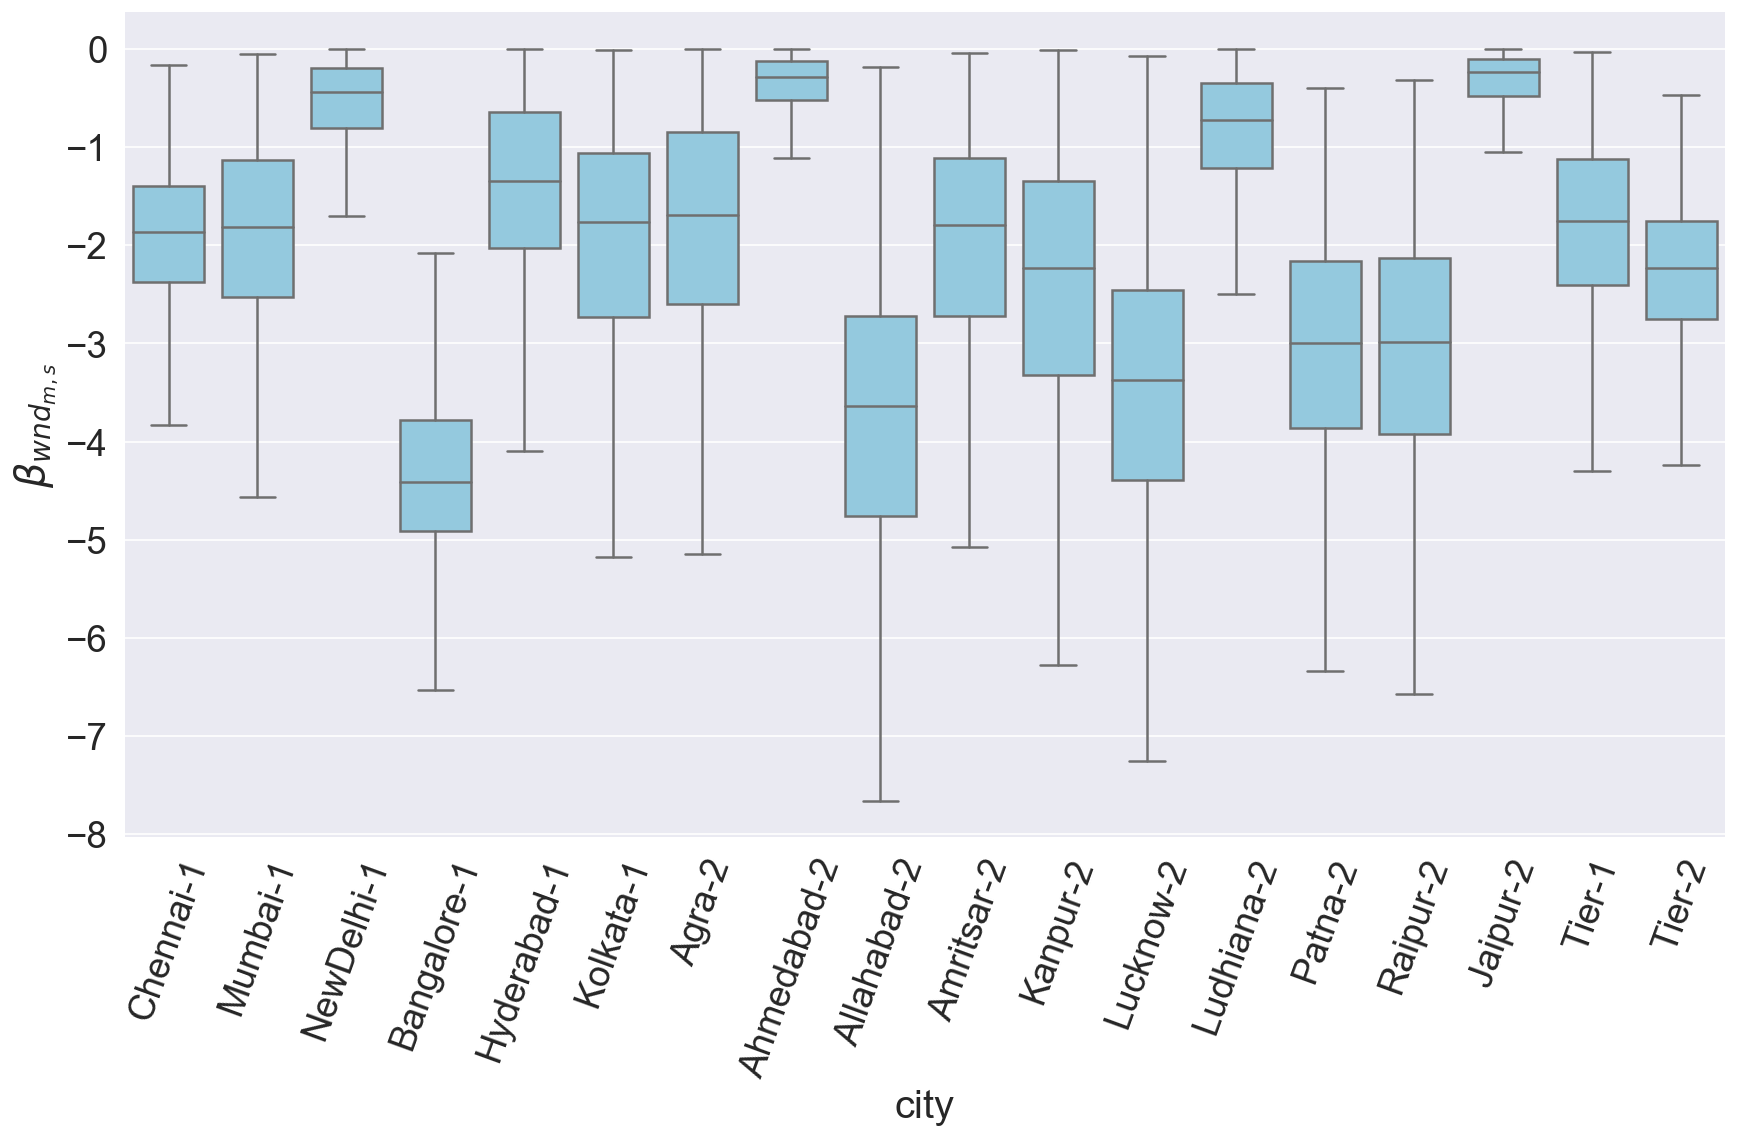

In [141]:
# beta 8
# get the sample trace for any particular beta
sdf = df.filter(regex=("beta8.."))
#replace the column name by city names (cityname s according to cityID2)
sdf.columns =  tiercitylist

# also add tier level summary 
sdf["Tier-1"] = df_beta["beta8_2.1"]
sdf["Tier-2"] = df_beta["beta8_2.2"]


#plot
sns.set(font_scale=2)
fig=plt.figure(figsize=(15, 10), dpi= 120, facecolor='w', edgecolor='k')
sns_plot = sns.boxplot(x="variable", y="value", data=pd.melt(sdf), showfliers=False, color="skyblue")
sns_plot.set(xlabel='city', ylabel='$\\beta_{wnd_{m,s}}$')
plt.xticks(rotation=70)
plt.tight_layout()
sns_plot.get_figure().savefig(os.path.join(out_path_plot, "beta8.png"))

sdf.describe()

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Chennai-1,Mumbai-1,NewDelhi-1,Bangalore-1,Hyderabad-1,Kolkata-1,Agra-2,Ahmedabad-2,Allahabad-2,Amritsar-2,Kanpur-2,Lucknow-2,Ludhiana-2,Patna-2,Raipur-2,Jaipur-2,Tier-1,Tier-2
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,0.146254,0.074070,0.205015,0.283228,0.149985,0.117170,0.340183,0.297897,0.093237,0.243154,0.125863,0.115432,0.297331,0.078096,0.129874,0.257117,0.202009,0.175357
std,0.079182,0.053284,0.060445,0.084464,0.070737,0.064275,0.077424,0.067336,0.059235,0.088102,0.067664,0.064458,0.086021,0.054812,0.050263,0.063993,0.061019,0.044903
min,0.005011,0.000348,0.041130,0.073250,0.005789,0.000378,0.133679,0.125415,0.001220,0.035512,0.000274,0.002039,0.029071,0.000376,0.013522,0.093246,0.030634,0.058224
25%,0.086798,0.029718,0.164427,0.221029,0.101226,0.070162,0.289103,0.248311,0.045780,0.176990,0.074570,0.064922,0.245171,0.033433,0.094670,0.211494,0.161276,0.144441
50%,0.140341,0.064956,0.204754,0.278920,0.148469,0.109698,0.341295,0.294234,0.086413,0.242589,0.121694,0.111694,0.296424,0.065853,0.125937,0.254645,0.196520,0.170960
75%,0.193625,0.108596,0.243313,0.330962,0.197198,0.159389,0.391265,0.345910,0.133433,0.299651,0.173050,0.161633,0.352935,0.110846,0.161187,0.298534,0.241239,0.203669
max,0.423139,0.320598,0.428182,0.685681,0.421496,0.349948,0.550382,0.525955,0.290005,0.507972,0.368777,0.354910,0.573162,0.283175,0.299070,0.498560,0.408340,0.339490


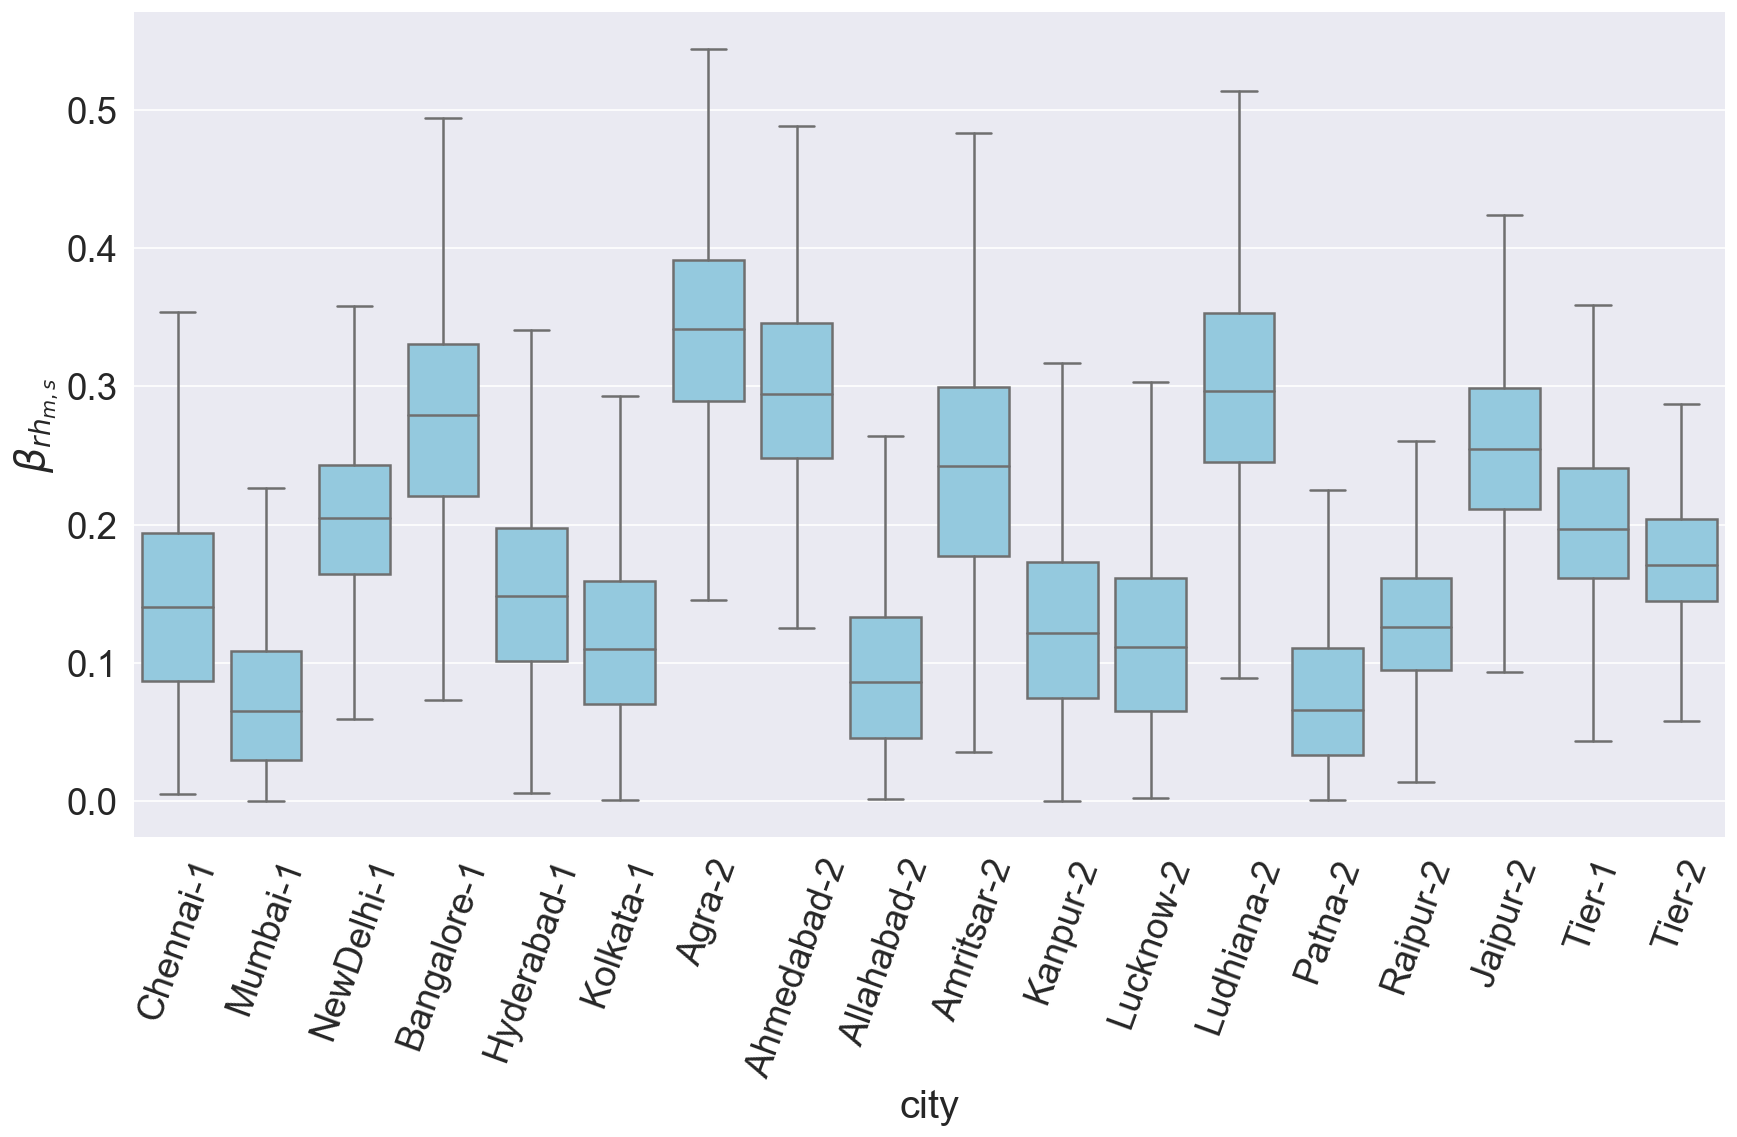

In [142]:
# beta 9
# get the sample trace for any particular beta
sdf = df.filter(regex=("beta9.."))
#replace the column name by city names (cityname s according to cityID2)
sdf.columns =  tiercitylist

# also add tier level summary 
sdf["Tier-1"] = df_beta["beta9_2.1"]
sdf["Tier-2"] = df_beta["beta9_2.2"]


#plot
sns.set(font_scale=2)
fig=plt.figure(figsize=(15, 10), dpi= 120, facecolor='w', edgecolor='k')
sns_plot = sns.boxplot(x="variable", y="value", data=pd.melt(sdf), showfliers=False, color="skyblue")
sns_plot.set(xlabel='city', ylabel='$\\beta_{rh_{m,s}}$')
plt.xticks(rotation=70)
plt.tight_layout()
sns_plot.get_figure().savefig(os.path.join(out_path_plot, "beta9.png"))

sdf.describe()

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Chennai-1,Mumbai-1,NewDelhi-1,Bangalore-1,Hyderabad-1,Kolkata-1,Agra-2,Ahmedabad-2,Allahabad-2,Amritsar-2,Kanpur-2,Lucknow-2,Ludhiana-2,Patna-2,Raipur-2,Jaipur-2,Tier-1,Tier-2
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,-0.000867,-0.000815,-0.000839,-0.000849,-0.000800,-0.000792,-0.000791,-0.000802,-0.000841,-0.000773,-0.000870,-0.000827,-0.000771,-0.000845,-0.000845,-0.000769,-0.000799,-0.000832
std,0.000619,0.000568,0.000568,0.000592,0.000613,0.000603,0.000620,0.000540,0.000574,0.000587,0.000594,0.000548,0.000599,0.000641,0.000571,0.000545,0.000577,0.000534
min,-0.004968,-0.003540,-0.003264,-0.003927,-0.003733,-0.003652,-0.004385,-0.003118,-0.003739,-0.003641,-0.005877,-0.003296,-0.003434,-0.004843,-0.003652,-0.003105,-0.003607,-0.003341
25%,-0.001129,-0.001079,-0.001120,-0.001129,-0.001097,-0.001060,-0.001050,-0.001076,-0.001099,-0.001028,-0.001123,-0.001090,-0.001023,-0.001129,-0.001135,-0.001044,-0.001045,-0.001083
50%,-0.000740,-0.000713,-0.000751,-0.000732,-0.000638,-0.000627,-0.000618,-0.000689,-0.000718,-0.000631,-0.000764,-0.000723,-0.000609,-0.000670,-0.000737,-0.000673,-0.000649,-0.000727
75%,-0.000428,-0.000375,-0.000422,-0.000416,-0.000357,-0.000364,-0.000356,-0.000398,-0.000417,-0.000349,-0.000435,-0.000414,-0.000342,-0.000389,-0.000416,-0.000362,-0.000394,-0.000436
max,-0.000002,-0.000017,-0.000001,-0.000034,-0.000014,-0.000012,-0.000003,-0.000008,-0.000030,-0.000017,-0.000044,-0.000029,-0.000001,-0.000018,-0.000034,-0.000016,-0.000012,-0.000053


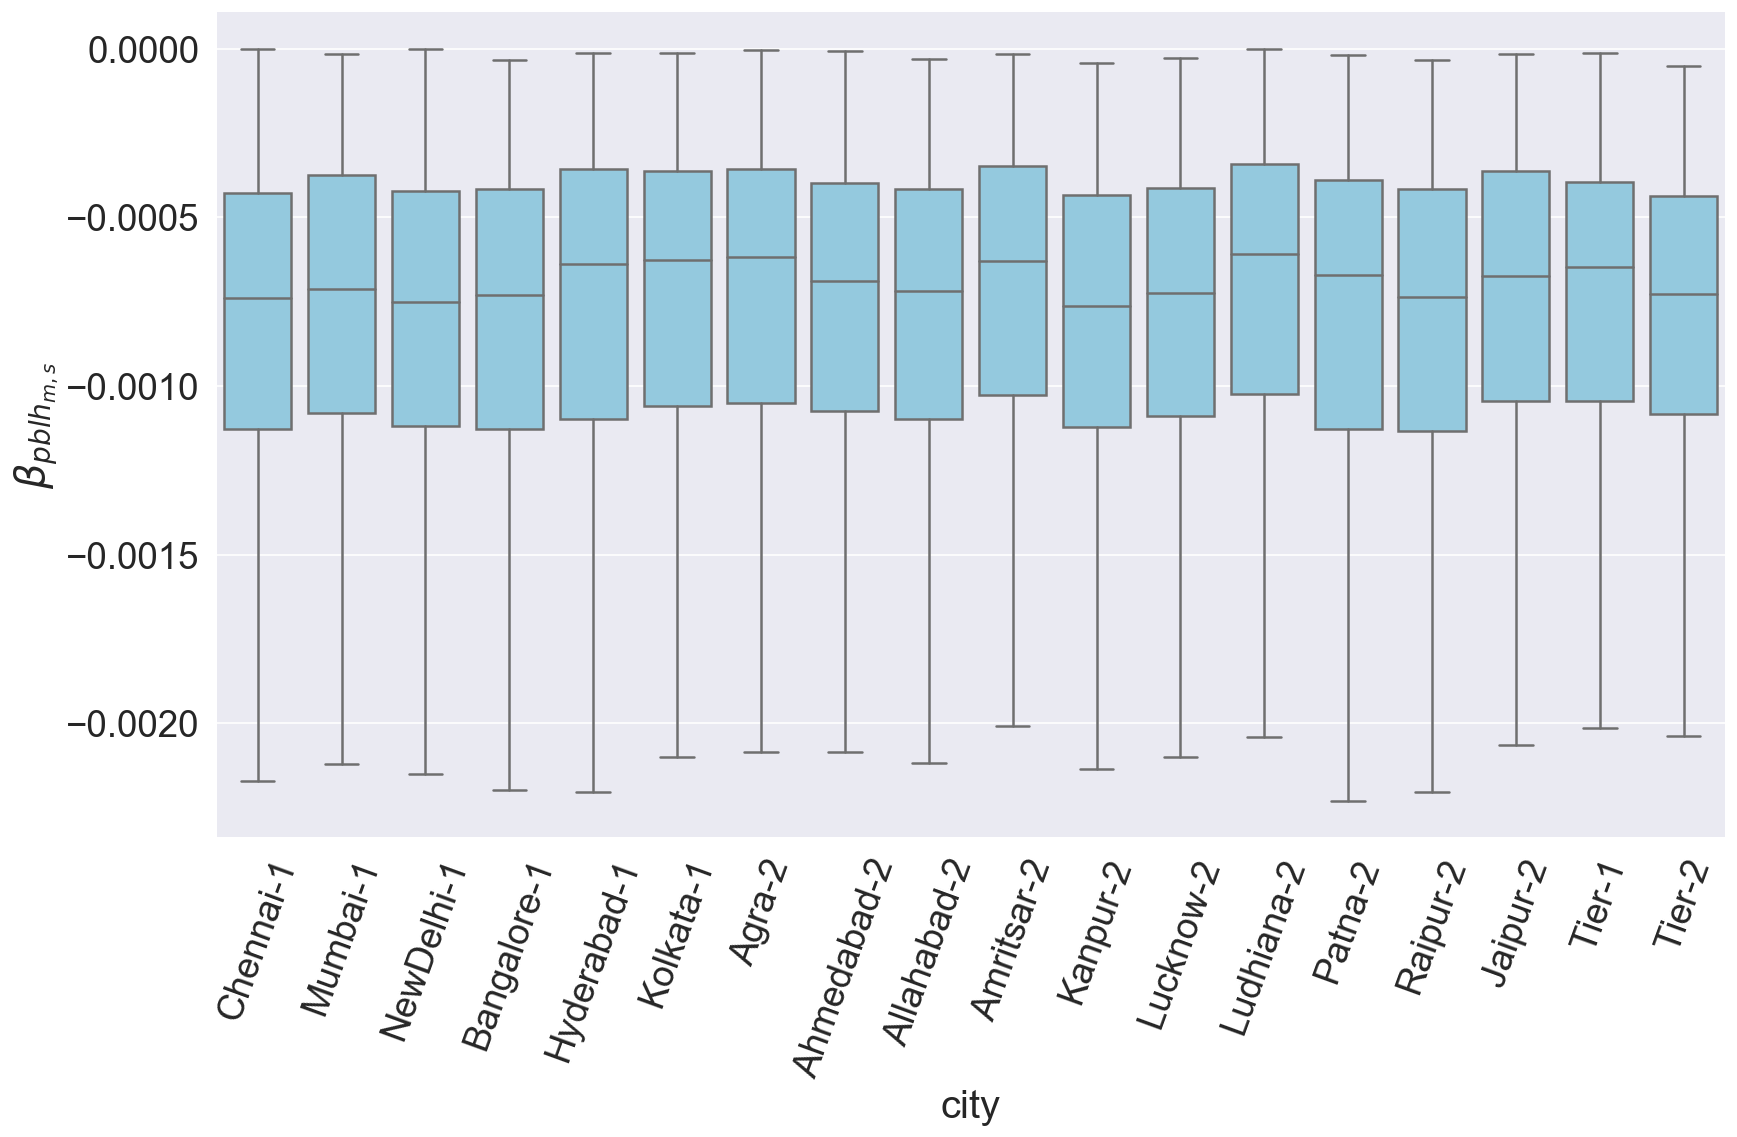

In [143]:
# beta 10
# get the sample trace for any particular beta
sdf = df.filter(regex=("beta10.."))
#replace the column name by city names (cityname s according to cityID2)
sdf.columns =  tiercitylist

# also add tier level summary 
sdf["Tier-1"] = df_beta["beta10_2.1"]
sdf["Tier-2"] = df_beta["beta10_2.2"]

#plot
sns.set(font_scale=2)
fig=plt.figure(figsize=(15, 10), dpi= 120, facecolor='w', edgecolor='k')
sns_plot = sns.boxplot(x="variable", y="value", data=pd.melt(sdf), showfliers=False, color="skyblue")
sns_plot.set(xlabel='city', ylabel='$\\beta_{pblh_{m,s}}$')
plt.xticks(rotation=70)
plt.tight_layout()
sns_plot.get_figure().savefig(os.path.join(out_path_plot, "beta10.png"))

sdf.describe()